## 다양한 시각화 라이브러리에 대하여 [](http://www.incodom.kr/파이썬/라이브러리/Matplotlib#h_888e2f72e47fd5609cdccf17696bb536)
들어가기에 앞서 다양한 시각 라이브러리에 대해 말하고자 한다. R언어를 이용한다면 ggplot이란 라이브러리가 독점적으로 쓰이고 있지만, python에서는 matplotlib을 포함하여 seaborn, plotly, folium, 등 여러 라이브러리가 분석가의 목적에 따라 혹은 기호에 따라 다양하게 쓰이고 있다. 필자에게 이들 중 가장 대중적인 기본 플랏(적당히 간단하며 플랏다운)을 고르라면 단연 matplotlib이며 이것보다 좀더 화려하게 쓰고 싶다면 seaborn, plotly를 이용하기 시작한다.
## Matplotlib 란? [](http://www.incodom.kr/파이썬/라이브러리/Matplotlib#h_12a420eebe1dddd48b87dbde89d813fb)
[Matplotlib](http://www.incodom.kr/Matplotlib)는 수많은 [파이썬](http://www.incodom.kr/파이썬) 라이브러리 중에서 플롯(그래프)을 그릴 때 주로 쓰이는 2D, 3D 플롯팅 패키지(모듈)이다. 현재까지(19년 12월 기준) open source를 통해 3.1.1 버전까지 개발됐으며 자세한 정보는 아래 링크를 통해 확인할 수 있다.
[홈페이지](http://matplotlib.org/)

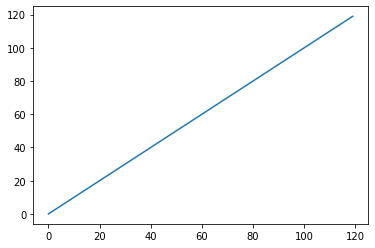

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ary = np.array(range(120))
plt.plot(ary)
plt.show()

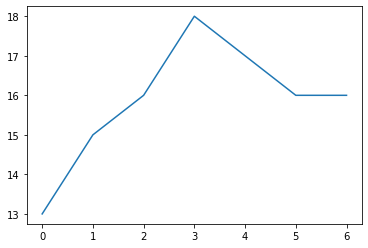

In [31]:
# ▪ plot() 메소드의 입력 파라미터의 개수가 2개인 경우
ary = [13,15,16,18,17,16,16] #– 두 번째 항목은 y축 좌표값
plt.plot(range(len(ary)),ary); #– 첫 번째 항목은 x축 좌표값

In [32]:
from IPython.display import set_matplotlib_formats # 맑은 고딕
set_matplotlib_formats('retina')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

Text(0.5, 1.0, '우리 서점 판매량')

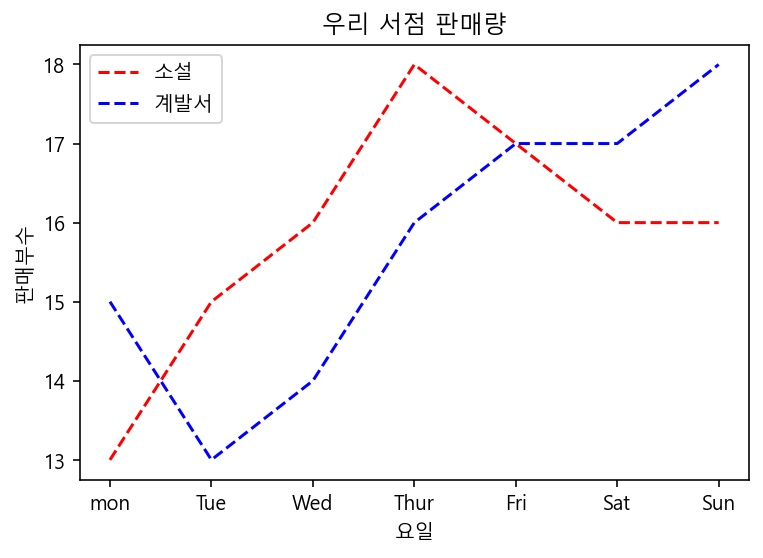

In [54]:
x = ['mon', 'Tue', 'Wed' , 'Thur', 'Fri', 'Sat','Sun'] #x축에 의미 있는 문자(열) 넣기
ary = [13,15,16,18,17,16,16]
ary_2 = [15, 13,14,16,17,17,18]
plt.plot(x,ary, label='소설', color='red', linestyle ='dashed'); # ; 붙이면 plt.show()와 같은 효과
plt.plot(x,ary_2, label='계발서', color='blue', linestyle ='dashed'); # 그래프 한개 추가
plt.xlabel('요일') #x축에 라벨
plt.ylabel('판매부수') #y축에 라벨
plt.legend(loc=0) # 레전드(legend) 붙이기
plt.title('우리 서점 판매량')

#### 히스토그램

matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)

#### 정규 분포 그래프 standard_normal() 사용
표준정규분포 N(1, 0)이 아닌, 평균 μ, 표준편차 σ 를 갖는 정규분포 N(μ, σ2)의 난수를 샘플링하기 위해서는

σ * np.random.standard_normal(…) + μ 와 같은 형태로 사용합니다.

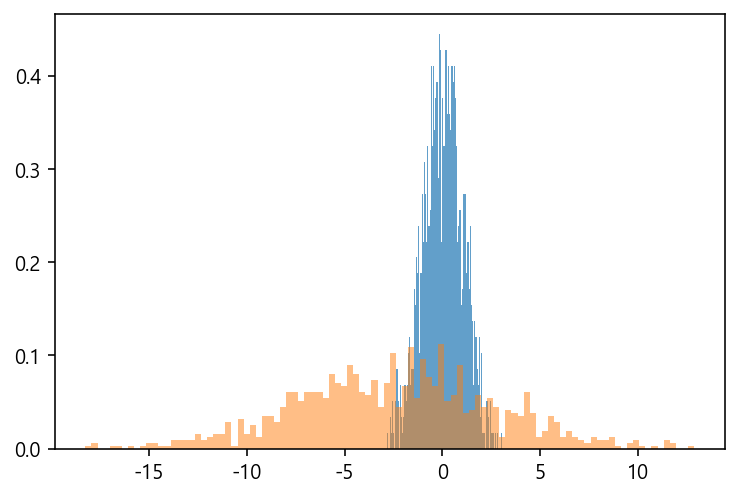

In [76]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.standard_normal(1000) # a는 표준정규분포를 갖는 임의의 실수 10000개이고,
b = 5.0 * np.random.standard_normal(1000) - 2.5 # b는 표준편차 5.0, 평균 -2.5를 갖는 임의의 실수 10000개입니다.

plt.hist(a, bins=100, density=True, alpha=0.7, histtype='bar')
plt.hist(b, bins=100, density=True, alpha=0.5, histtype='stepfilled')
plt.show()

#### 애니메이션

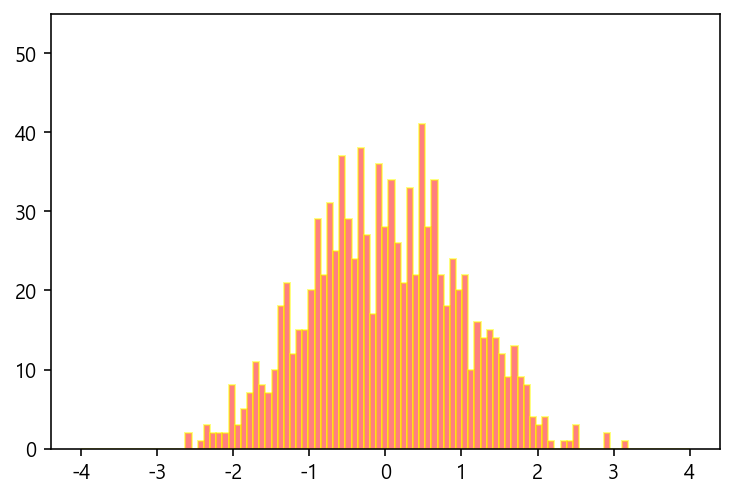

In [67]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)

def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="red", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.savefig("hist.pdf") #pdf 파일로 저장
plt.show()
